# K Means Clustering

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('iris.csv')
print(data.shape)
data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = data.iloc[:,:-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=16)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=16, tol=0.0001, verbose=0)

In [6]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2])

In [7]:
import numpy as np
color_scheme  = np.array(['red','green','orange','black'])

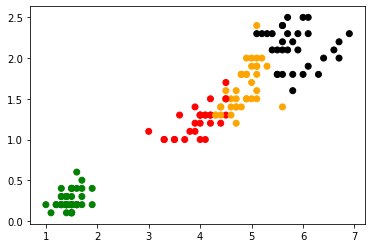

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X.petal_length,X.petal_width,color = color_scheme[model.labels_]);

# Plotting your model outputs

In [9]:
model.cluster_centers_

array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.2525    , 2.855     , 4.815     , 1.625     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ]])

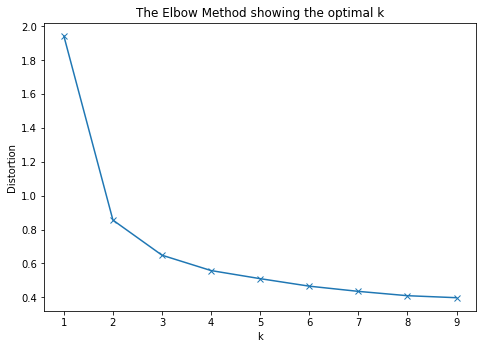

In [10]:
# clustering dataset
# determine k using elbow method
from scipy.spatial.distance import cdist
# create new plot and data
X = data.iloc[:,:-1]
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,10))
ax.set_xlabel('k')
ax.set_ylabel('Distortion')
ax.set_title('The Elbow Method showing the optimal k')
ax.plot(K, distortions, marker = 'x')

plt.show()

# Logistic Regression

In [11]:
data = pd.read_csv('breast_cancer.csv')
data.shape
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
X = data.iloc[:,:-1]
y = data.outcome
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 10)

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=6,
                               random_state=10,
                               criterion='entropy'
                              )
model.fit(X_train, y_train) # Training

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

C:\Users\GopiKrish\Anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Decision Tree (Prone to error)

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [45]:
# Training Accuracy
y_predict_train = model.predict(X_train) # Prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_predict_train))
pd.crosstab(y_train, y_predict_train)

0.8891645988420182


col_0,acc,unacc,vgood
outcome,,,
acc,246,22,14
good,43,0,5
unacc,50,789,0
vgood,0,0,40


In [37]:
# Testing Accuracy
y_predict_test = model.predict(X_test) # Prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict_test))
pd.crosstab(y_test, y_predict_test)

0.9922928709055877


col_0,acc,good,unacc,vgood
outcome,,,,
acc,101,0,1,0
good,2,19,0,0
unacc,0,0,371,0
vgood,1,0,0,24


In [35]:
y_test.head()[0:5]

954     unacc
115     unacc
1422    unacc
35      unacc
1579     good
Name: outcome, dtype: object

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9922928709055877

In [32]:
pd.crosstab(y_test,y_predict)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,101,0,1,0
good,2,19,0,0
unacc,0,0,371,0
vgood,1,0,0,24


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         acc       0.97      0.99      0.98       102
        good       1.00      0.90      0.95        21
       unacc       1.00      1.00      1.00       371
       vgood       1.00      0.96      0.98        25

    accuracy                           0.99       519
   macro avg       0.99      0.96      0.98       519
weighted avg       0.99      0.99      0.99       519



# Evaluation

In [14]:
y_test.head(),y_predict

(172    0
 553    1
 374    1
 370    0
 419    1
 Name: outcome, dtype: int64,
 array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64))

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9473684210526315

In [16]:
pd.crosstab(y_test,y_predict)

col_0,0,1
outcome,,
0,56,3
1,6,106


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        59
           1       0.97      0.95      0.96       112

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [18]:
datacorr = data.corr()
datacorr[abs(datacorr)< .5].loc[:,'mean radius']

mean radius                     NaN
mean texture               0.323782
mean perimeter                  NaN
mean area                       NaN
mean smoothness            0.170581
mean compactness                NaN
mean concavity                  NaN
mean concave points             NaN
mean symmetry              0.147741
mean fractal dimension    -0.311631
radius error                    NaN
texture error             -0.097317
perimeter error                 NaN
area error                      NaN
smoothness error          -0.222600
compactness error          0.206000
concavity error            0.194204
concave points error       0.376169
symmetry error            -0.104321
fractal dimension error   -0.042641
worst radius                    NaN
worst texture              0.297008
worst perimeter                 NaN
worst area                      NaN
worst smoothness           0.119616
worst compactness          0.413463
worst concavity                 NaN
worst concave points        

In [19]:
datacorr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


# KNN - K Nearest Neighbours

In [20]:
data = pd.read_csv('car_evaluation.csv')
print(data.shape)
data.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [21]:
from collections import Counter
Counter(data.outcome)

Counter({'unacc': 1210, 'acc': 384, 'vgood': 65, 'good': 69})

In [22]:
X = data.iloc[:,:-1]
y = data.outcome
from sklearn.preprocessing import LabelEncoder
enc_buy = LabelEncoder()
enc_maint = LabelEncoder()
enc_lug = LabelEncoder()
enc_safety = LabelEncoder()
X.buying = enc_buy.fit_transform(X.buying)
X.maint = enc_maint.fit_transform(X.maint)
X.lug_boot = enc_lug.fit_transform(X.lug_boot)
X.safety = enc_safety.fit_transform(X.safety)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                            random_state=10)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.928709055876686
              precision    recall  f1-score   support

         acc       0.82      0.87      0.84       102
        good       0.71      0.48      0.57        21
       unacc       0.97      0.99      0.98       371
       vgood       1.00      0.68      0.81        25

    accuracy                           0.93       519
   macro avg       0.87      0.75      0.80       519
weighted avg       0.93      0.93      0.93       519



col_0,acc,good,unacc,vgood
outcome,,,,
acc,89,2,11,0
good,10,10,1,0
unacc,5,0,366,0
vgood,5,2,1,17
